<a href="https://colab.research.google.com/github/MochNad/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Pengolahan Citra dan Visi Komputer - Modul 7**
*   Nama : Moch. Nadi Rafli Maulana
*   NIM : 2141720188
*   No. Absen : 18
*   Kelas : TI-3B
*   Jurusan / Prodi : Teknologi Informasi / D4 - Teknik Informatika

> **▶ PRAKTIKUM FILTER**

In [1]:
# Import modul drive dari google.colab
from google.colab import drive

# Mount Google Drive ke direktori /content/drive di Google Colab
# Ini akan memungkinkan Anda untuk mengakses file di Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import modul numpy dan alias-nya sebagai np
import numpy as np

# Import modul matplotlib.pyplot dan alias-nya sebagai plt
import matplotlib.pyplot as plt

# Import modul cv2 dan alias-nya sebagai cv
import cv2 as cv

# Import modul math
import math

# Import fungsi cv2_imshow dari modul google.colab.patches
# Ini akan digunakan untuk menampilkan citra di lingkungan Google Colab
from google.colab.patches import cv2_imshow

# Import modul Image dari Pillow dan alias-nya sebagai im
# Ini digunakan untuk manipulasi gambar dan citra dalam beberapa kasus
from PIL import Image as im

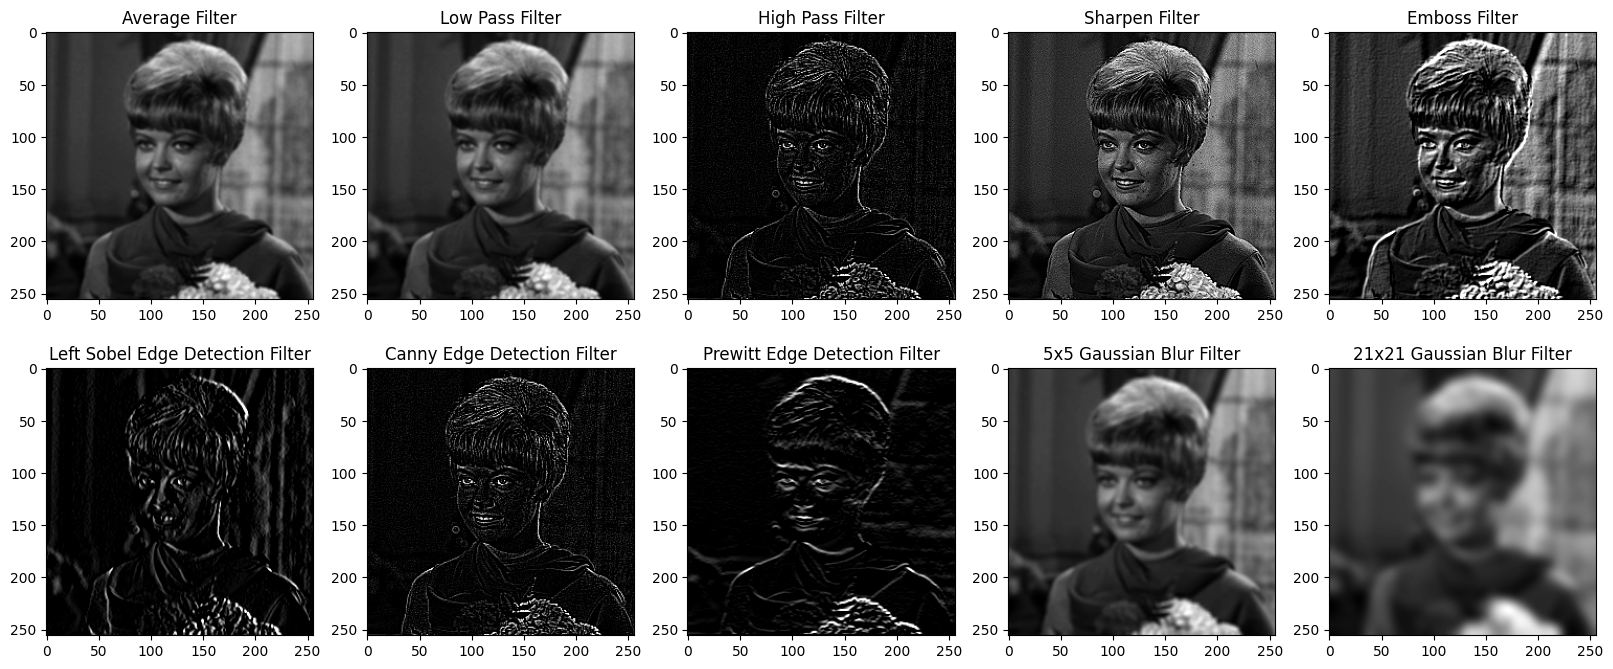

In [29]:
# Memuat citra
image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Mendefinisikan ukuran kernel dan sigma untuk Gaussian blur
kernel_size_3x3 = 3
kernel_size_5x5 = 5
kernel_size_21x21 = 21
sigma_3x3 = math.sqrt(kernel_size_3x3)
sigma_5x5 = math.sqrt(kernel_size_5x5)
sigma_21x21 = math.sqrt(kernel_size_21x21)

# Membuat kernel Gaussian
gaussian_kernel_3x3 = cv.getGaussianKernel(kernel_size_3x3, sigma_3x3)
gaussian_kernel_5x5 = cv.getGaussianKernel(kernel_size_5x5, sigma_5x5)
gaussian_kernel_21x21 = cv.getGaussianKernel(kernel_size_21x21, sigma_21x21)
gauss_kernel_3x3 = gaussian_kernel_3x3 @ gaussian_kernel_3x3.transpose()
gauss_kernel_5x5 = gaussian_kernel_5x5 @ gaussian_kernel_5x5.transpose()
gauss_kernel_21x21 = gaussian_kernel_21x21 @ gaussian_kernel_21x21.transpose()

# Mengaplikasikan filter ke citra dan menyimpan hasilnya dalam daftar
filtered_images = [
    cv.filter2D(image, -1, np.ones((3, 3), np.float32) / 9.0),  # Filter Rata-rata
    cv.filter2D(image, -1, gauss_kernel_3x3),  # Filter Low Pass
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]], dtype=np.float32)),  # Filter High Pass
    cv.filter2D(image, -1, np.array([[0, -1, 0],
                                    [-1,  5, -1],
                                    [0, -1, 0]], dtype=np.float32)),  # Filter Sharpen
    cv.filter2D(image, -1, np.array([[-2, -1,  0],
                                    [-1,  1,  1],
                                    [ 0,  1,  2]], dtype=np.float32)),  # Filter Emboss
    cv.filter2D(image, -1, np.array([[1, 0, -1],
                                    [2, 0, -2],
                                    [1, 0, -1]], dtype=np.float32)),  # Filter Deteksi Tepi Kiri Sobel
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]], dtype=np.float32)),  # Filter Deteksi Tepi Canny
    cv.filter2D(image, -1, np.array([[-1, -1, -1],
                                    [0, 0, 0],
                                    [1, 1, 1]], dtype=np.float32)),  # Filter Deteksi Tepi Prewitt
    cv.filter2D(image, -1, gauss_kernel_5x5),  # Filter Gaussian 5x5
    cv.filter2D(image, -1, gauss_kernel_21x21)  # Filter Gaussian 21x21
]

# Membuat subplot untuk setiap citra hasil filter
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Menentukan nama filter untuk label
filter_names = [
    'Average Filter',
    'Low Pass Filter',
    'High Pass Filter',
    'Sharpen Filter',
    'Emboss Filter',
    'Left Sobel Edge Detection Filter',
    'Canny Edge Detection Filter',
    'Prewitt Edge Detection Filter',
    '5x5 Gaussian Blur Filter',
    '21x21 Gaussian Blur Filter'
]

# Menampilkan dan memberi label pada setiap citra hasil filter
for i, ax in enumerate(axs.flat):
    ax.imshow(filtered_images[i], cmap='gray')
    ax.set_title(filter_names[i])
    ax.axis('on')

# Menampilkan plot
plt.show()